In [6]:
import math

In [10]:
Total_Entropy=(9/14)*math.log(14/9,2) +(5/14)*math.log(14/5,2)
Total_Entropy

0.940285958670631

In [11]:
Humidity_high= (3/7)*math.log(7/3,2) +(4/7)*math.log(7/4,2)
Humidity_high

0.9852281360342514

In [12]:
Humidity_Norm= (6/7)*math.log(7/6,2) +(1/7)*math.log(7/1,2)
Humidity_Norm

0.5916727785823275

In [13]:
Inform_gain_humidity= Total_Entropy-((7/14)*Humidity_high + (7/14)*Humidity_Norm)
Inform_gain_humidity

0.15183550136234159

In [14]:
Windy_Strong= (3/6)*math.log(6/3,2) +(3/6)*math.log(6/3,2)
Windy_Strong

1.0

In [15]:
math.log(1,2)

0.0

In [16]:
Sunny_Humid_Total_Ent= (2/5)*math.log(5/2,2) +(3/5)*math.log(5/3,2)
Sunny_Humid_Total_Ent

0.9709505944546687

In [17]:
sunny_wind_strong= (1/2)*math.log(2/1,2) +(1/2)*math.log(2/1,2)
sunny_wind_strong

1.0

In [18]:
sunny_wind_weak= (1/3)*math.log(3/1,2) +(2/3)*math.log(3/2,2)
sunny_wind_weak

0.9182958340544896

In [19]:
Inform_Gain_sunny_wind= Sunny_Humid_Total_Ent-((2/5)*1 +(3/5)*0.918)

In [20]:
Inform_Gain_sunny_wind

0.020150594454668713

In [21]:
GI_for_sunny= 1-((2/5)**2 + (3/5)**2)

In [22]:
GI_for_sunny

0.48

In [23]:
GI_for_Overcast= 1-((4/4)**2 + (0/4)**2)

In [24]:
GI_for_Overcast

0.0

In [25]:
GI_for_rainy= 1-((3/5)**2 + (2/5)**2)
GI_for_rainy

0.48

In [26]:
GI_outlook=((0.48)*(5/14))+ ((4/14)*0) +((0.48)*(5/14))

In [27]:
GI_outlook

0.34285714285714286

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.impute import SimpleImputer

In [32]:
df= pd.read_csv('horse.csv')

In [33]:
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [34]:
df.shape

(299, 28)

In [35]:
target= df[['outcome']]

In [36]:
target.value_counts()

outcome   
lived         178
died           77
euthanized     44
dtype: int64

In [37]:
features= df.drop('outcome',axis=1)

In [38]:
features

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,distend_large,45.0,8.4,NaN,NaN,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,other,50.0,85.0,cloudy,2.0,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,normal,33.0,6.7,NaN,NaN,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,NaN,48.0,7.2,serosanguious,5.3,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,NaN,74.0,7.4,NaN,NaN,no,4300,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,533886,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,...,distend_large,55.0,65.0,NaN,NaN,no,3205,0,0,no
295,no,adult,527702,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,...,distend_small,44.0,NaN,serosanguious,3.3,yes,2208,0,0,yes
296,yes,adult,529386,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,...,distend_large,60.0,6.8,NaN,NaN,yes,3205,0,0,no
297,yes,adult,530612,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,...,distend_small,50.0,6.0,serosanguious,3.4,yes,2208,0,0,yes


In [39]:
features= pd.get_dummies(features)

In [40]:
features

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,...,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,surgical_lesion_no,surgical_lesion_yes,cp_data_no,cp_data_yes
0,530101,38.5,66.0,28.0,NaN,45.0,8.4,NaN,11300,0,...,0,0,0,0,0,0,1,0,1,0
1,534817,39.2,88.0,20.0,NaN,50.0,85.0,2.0,2208,0,...,0,0,1,0,1,0,1,0,1,0
2,530334,38.3,40.0,24.0,NaN,33.0,6.7,NaN,0,0,...,0,1,0,0,0,0,1,0,0,1
3,5290409,39.1,164.0,84.0,5.0,48.0,7.2,5.3,2208,0,...,0,0,0,0,0,1,0,1,0,1
4,530255,37.3,104.0,35.0,NaN,74.0,7.4,NaN,4300,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,533886,NaN,120.0,70.0,NaN,55.0,65.0,NaN,3205,0,...,0,0,0,0,0,0,1,0,1,0
295,527702,37.2,72.0,24.0,NaN,44.0,NaN,3.3,2208,0,...,0,0,0,0,0,1,0,1,0,1
296,529386,37.5,72.0,30.0,NaN,60.0,6.8,NaN,3205,0,...,0,0,0,0,0,0,0,1,1,0
297,530612,36.5,100.0,24.0,NaN,50.0,6.0,3.4,2208,0,...,0,0,0,0,0,1,0,1,0,1


In [41]:
features.isnull().sum()

hospital_number                      0
rectal_temp                         60
pulse                               24
respiratory_rate                    58
nasogastric_reflux_ph              246
                                  ... 
abdomo_appearance_serosanguious      0
surgical_lesion_no                   0
surgical_lesion_yes                  0
cp_data_no                           0
cp_data_yes                          0
Length: 67, dtype: int64

In [42]:
x_train,x_test,y_train,y_test= train_test_split(features,target,train_size=0.75,random_state=100)

In [43]:
x_train.isnull().sum()

hospital_number                      0
rectal_temp                         47
pulse                               22
respiratory_rate                    47
nasogastric_reflux_ph              177
                                  ... 
abdomo_appearance_serosanguious      0
surgical_lesion_no                   0
surgical_lesion_yes                  0
cp_data_no                           0
cp_data_yes                          0
Length: 67, dtype: int64

In [44]:
x_test.isnull().sum()

hospital_number                     0
rectal_temp                        13
pulse                               2
respiratory_rate                   11
nasogastric_reflux_ph              69
                                   ..
abdomo_appearance_serosanguious     0
surgical_lesion_no                  0
surgical_lesion_yes                 0
cp_data_no                          0
cp_data_yes                         0
Length: 67, dtype: int64

In [46]:
simple_impute= SimpleImputer(missing_values=np.nan, strategy='mean')

In [47]:
x_train= simple_impute.fit_transform(x_train)
x_test= simple_impute.fit_transform(x_test)

In [49]:
pd.DataFrame(x_train).isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
62    0
63    0
64    0
65    0
66    0
Length: 67, dtype: int64

In [50]:
pd.DataFrame(x_test).isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
62    0
63    0
64    0
65    0
66    0
Length: 67, dtype: int64

In [80]:
dec_tree= DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=3)

In [81]:
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, splitter='random')

In [82]:
y_pred= dec_tree.predict(x_test)

In [83]:
y_pred

array(['lived', 'lived', 'lived', 'lived', 'died', 'died', 'lived',
       'lived', 'lived', 'euthanized', 'lived', 'died', 'euthanized',
       'lived', 'lived', 'lived', 'died', 'lived', 'lived', 'lived',
       'lived', 'lived', 'lived', 'lived', 'lived', 'lived', 'lived',
       'lived', 'lived', 'lived', 'lived', 'lived', 'died', 'lived',
       'died', 'lived', 'lived', 'died', 'died', 'euthanized', 'lived',
       'lived', 'lived', 'lived', 'lived', 'died', 'lived', 'died',
       'lived', 'lived', 'died', 'lived', 'lived', 'lived', 'died',
       'lived', 'lived', 'lived', 'lived', 'lived', 'lived', 'lived',
       'died', 'lived', 'lived', 'lived', 'lived', 'lived', 'died',
       'died', 'lived', 'lived', 'lived', 'lived', 'euthanized'],
      dtype=object)

In [84]:
accuracy_score(y_test,y_pred)

0.72

### Gridsearch

In [56]:
params= {'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':[1,2,3,45,6,7,8,9,10]}

In [57]:
grid_search= GridSearchCV(dec_tree,params)

In [58]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 45, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']})

In [59]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 9, 'splitter': 'random'}

## Plotting the Decision Tree

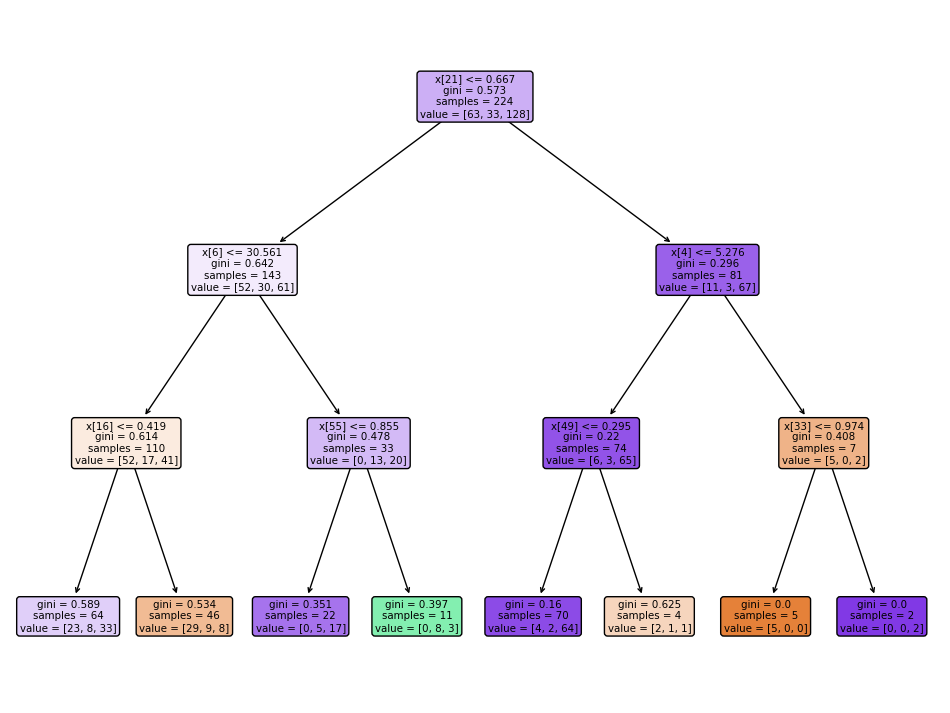

In [99]:
plt.figure(figsize=(12,9))
plot_tree(dec_tree,filled=True,rounded=True,feature_names=df.get(features),max_depth=5);